# Results analysis for the paper

### Filtering out invalid models

In [124]:
import re
import pandas as pd

# Extract model names from the log file
with open('../results/RQ1/invalid_models_log.txt', "r", encoding="utf-8") as f:
    log_content = f.read()

model_names_to_remove = re.findall(r"error loading model:\s+(.+?)\s+with", log_content)

df = pd.read_csv("../results/RQ1/models.csv")

# Filter out rows where 'model' is in the list of models to remove
filtered_df = df[~df['model'].isin(model_names_to_remove)]
filtered_df.to_csv("../results/RQ1/valid_models.csv", index=False)

print(f"Removed {len(df) - len(filtered_df)} rows. Saved to 'valid_models.csv'.")


Removed 319 rows. Saved to 'valid_models.csv'.


### Plotting model's data

In [125]:
import pandas as pd

df = pd.read_csv('../results/RQ1/valid_models.csv')
df.head()


,model,LOC,classes,attributes,refs,containments
0,.skriven,47,6,8,2,0
1,101companies,37,3,7,0,4
2,abapobj,220,13,47,7,13
3,ABase,23,5,4,0,0
4,ABC,18,3,0,0,0


C:\Users\lamp6\AppData\Local\Temp\ipykernel_7108\2603505946.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = ax.boxplot(


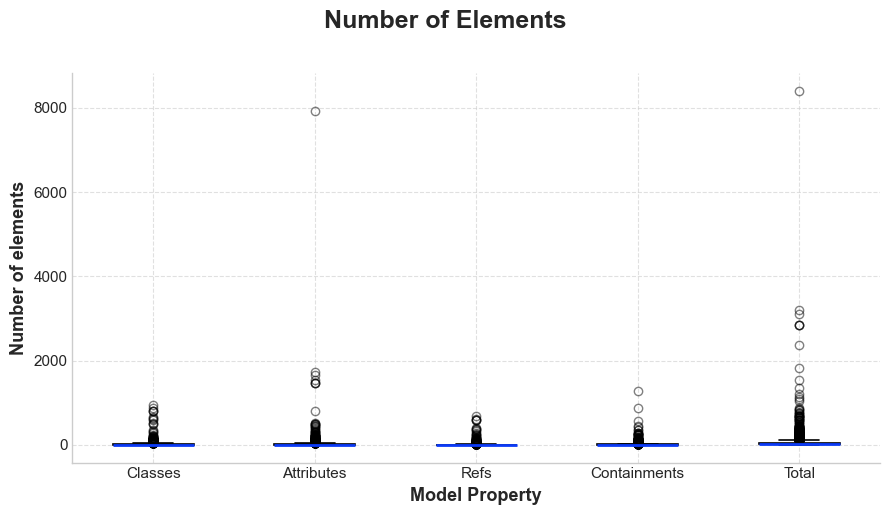

In [126]:
import pandas as pd
import matplotlib.pyplot as plt 

valid_df = pd.read_csv('../results/RQ1/valid_models.csv')
props = ['classes', 'attributes', 'refs', 'containments']

valid_df['total'] = valid_df[props].sum(axis=1)
data = [valid_df[prop].values for prop in props] + [valid_df['total'].values]
 

fig, ax = plt.subplots(figsize=(9, 5))
fig.suptitle('Number of Elements', fontsize=18, fontweight='bold', y=1.02)  
box = ax.boxplot(
    data,
    vert=True,
    patch_artist=True,
    labels=[p.capitalize() for p in props] + ['Total'],
    boxprops=dict(color='black', linewidth=1.2),
    medianprops=dict(color="#0B3AF7", linewidth=2),
    whiskerprops=dict(color='black', linewidth=1.2),
    capprops=dict(color='black', linewidth=1.2),
    flierprops=dict(marker='o', color='gray', alpha=0.5)
) 

ax.set_xlabel('Model Property', fontsize=13, fontweight='bold')
ax.set_ylabel('Number of elements', fontsize=13, fontweight='bold')
ax.tick_params(axis='x', labelsize=11)
ax.tick_params(axis='y', labelsize=11)
ax.grid(True, linestyle='--', alpha=0.6)
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)
plt.tight_layout()
plt.show()

### RQ1 Analysis

In [127]:
import pandas as pd
import glob

# Adjust the path and pattern as needed for your files
run_files = glob.glob('../results/RQ1/models_run*.csv')

all_times = []
all_mem = []
for file in run_files:
    df = pd.read_csv(file)
    all_times.extend(df['time'].values)
    all_mem.extend(df['mem'].values)

all_times = pd.Series(all_times)
print(f"Number of runs analyzed: {len(run_files)}")
print(f"Min time: {all_times.min():.2f} ms")
print(f"Max time: {all_times.max():.2f} ms")
print(f"Avg time: {all_times.mean():.2f} ms")

all_mem = pd.Series(all_mem) 
print(f"Min memory: {all_mem.min():.2f} KB")
print(f"Max memory: {all_mem.max():.2f} KB")
print(f"Avg memory: {all_mem.mean():.2f} KB")

Number of runs analyzed: 5
Min time: 4.00 ms
Max time: 2159.00 ms
Avg time: 15.94 ms
Min memory: 168.00 KB
Max memory: 44043.00 KB
Avg memory: 892.10 KB


#### Considering Time (ms)

C:\Users\lamp6\AppData\Local\Temp\ipykernel_7108\1480140447.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  blues = cm.get_cmap('Blues', num_runs + 2)


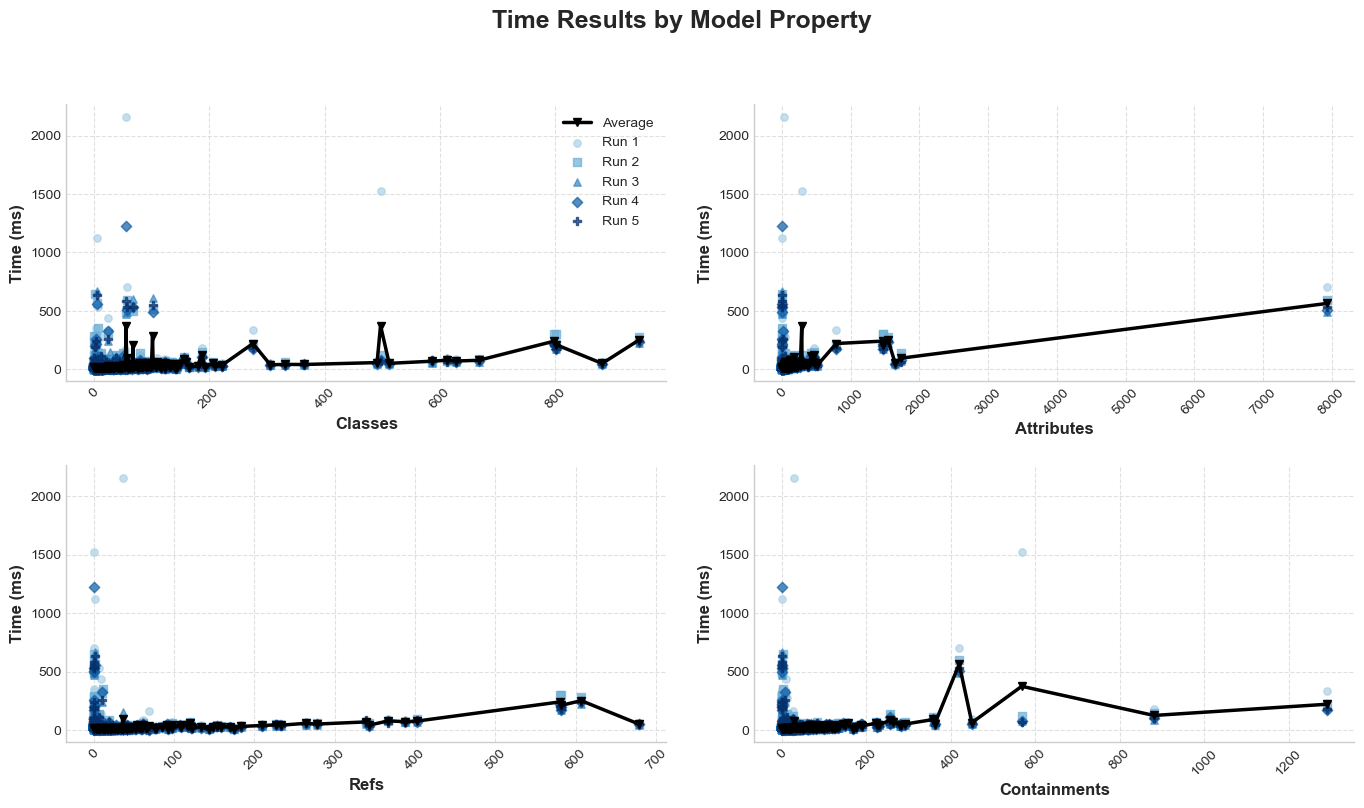

In [128]:
import matplotlib.pyplot as plt 
import matplotlib.cm as cm

num_runs = len(dfs)
blues = cm.get_cmap('Blues', num_runs + 2)
colors = [blues(i + 2) for i in range(num_runs)]

props = ['classes', 'attributes', 'refs', 'containments']
markers = ['o', 's', '^', 'D', 'P', 'X', '*', 'v'] 

fig, axes = plt.subplots(2, 2, figsize=(14, 8))
fig.suptitle('Time Results by Model Property', fontsize=18, fontweight='bold', y=1.02)  

for idx, prop in enumerate(props):
    avg_times = all_df.groupby(prop)['time'].mean()
    ax = axes[idx // 2, idx % 2]
    # Plot average line
    ax.plot(avg_times.index, avg_times.values, color="#000000", linewidth=2.5, label='Average', marker='v')
    # Plot each run with a different marker
    for i, df in enumerate(dfs):
        marker_style = markers[i % len(markers)]
        ax.scatter(df[prop], df['time'], label=f'Run {i+1}', alpha=0.7, s=28, marker=marker_style, color=colors[i])
    ax.set_xlabel(prop.capitalize(), fontsize=12, fontweight='bold')
    ax.set_ylabel('Time (ms)', fontsize=12, fontweight='bold')
    #ax.set_title(f'Time by {prop.capitalize()}', fontsize=13, fontweight='bold', pad=10)
    ax.tick_params(axis='x', labelsize=10, rotation=45)
    ax.tick_params(axis='y', labelsize=10)
    ax.grid(True, linestyle='--', alpha=0.6)
    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)
    if idx == 0:
        ax.legend(fontsize=10, loc='best')

plt.tight_layout(pad=2)
plt.show()

C:\Users\lamp6\AppData\Local\Temp\ipykernel_7108\2517190063.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = ax.boxplot(


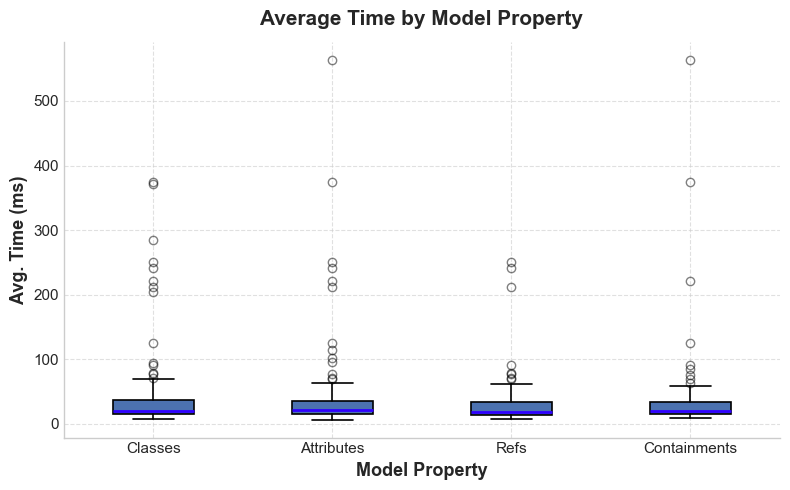

In [129]:
import matplotlib.pyplot as plt 

props = ['classes', 'attributes', 'refs', 'containments']
avg_time_data = [all_df.groupby(prop)['time'].mean().values for prop in props]

fig, ax = plt.subplots(figsize=(8, 5))

box = ax.boxplot(
    avg_time_data,
    vert=True,
    patch_artist=True,
    labels=[p.capitalize() for p in props],
    boxprops=dict(facecolor='#4C72B0', color='black', linewidth=1.2),
    medianprops=dict(color="#2F00FF", linewidth=2),
    whiskerprops=dict(color='black', linewidth=1.2),
    capprops=dict(color='black', linewidth=1.2),
    flierprops=dict(marker='o', color='gray', alpha=0.5)
)

ax.set_xlabel('Model Property', fontsize=13, fontweight='bold')
ax.set_ylabel('Avg. Time (ms)', fontsize=13, fontweight='bold')
ax.set_title('Average Time by Model Property', fontsize=15, fontweight='bold', pad=12)
ax.tick_params(axis='x', labelsize=11)
ax.tick_params(axis='y', labelsize=11)
ax.grid(True, linestyle='--', alpha=0.6)

for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

plt.tight_layout()
plt.show()

C:\Users\lamp6\AppData\Local\Temp\ipykernel_7108\902552370.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  blues = cm.get_cmap('Blues', num_runs + 2)


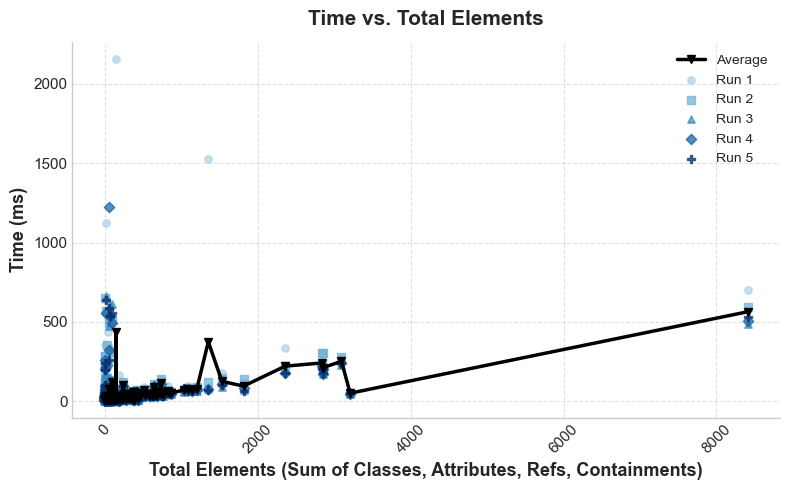

In [130]:
import matplotlib.pyplot as plt 
import matplotlib.cm as cm

num_runs = len(dfs)
blues = cm.get_cmap('Blues', num_runs + 2)
colors = [blues(i + 2) for i in range(num_runs)]

valid_df['total_structural'] = valid_df[['classes', 'attributes', 'refs', 'containments']].sum(axis=1)
model_total_structural = valid_df.set_index('model')['total_structural'] 
for df in dfs:
    df['total_structural'] = df['model'].map(model_total_structural) 
all_df_total = pd.concat(dfs)
 
avg_times = all_df_total.groupby('total_structural')['time'].mean()
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(avg_times.index, avg_times.values, color="#000000", linewidth=2.5, label='Average', marker='v')

markers = ['o', 's', '^', 'D', 'P', 'X', '*', 'v']
for i, df in enumerate(dfs):
    marker_style = markers[i % len(markers)]
    ax.scatter(df['total_structural'], df['time'], label=f'Run {i+1}', alpha=0.7, s=28, marker=marker_style, color=colors[i])
ax.set_xlabel('Total Elements (Sum of Classes, Attributes, Refs, Containments)', fontsize=13, fontweight='bold')
ax.set_ylabel('Time (ms)', fontsize=13, fontweight='bold')
ax.set_title('Time vs. Total Elements', fontsize=15, fontweight='bold', pad=12)
ax.tick_params(axis='x', labelsize=11, rotation=45)
ax.tick_params(axis='y', labelsize=11)
ax.grid(True, linestyle='--', alpha=0.6)
ax.legend(fontsize=10, loc='best')

for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

plt.tight_layout()
plt.show()

#### Considering memory (KB)

C:\Users\lamp6\AppData\Local\Temp\ipykernel_7108\1293429176.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  blues = cm.get_cmap('Blues', num_runs + 2)


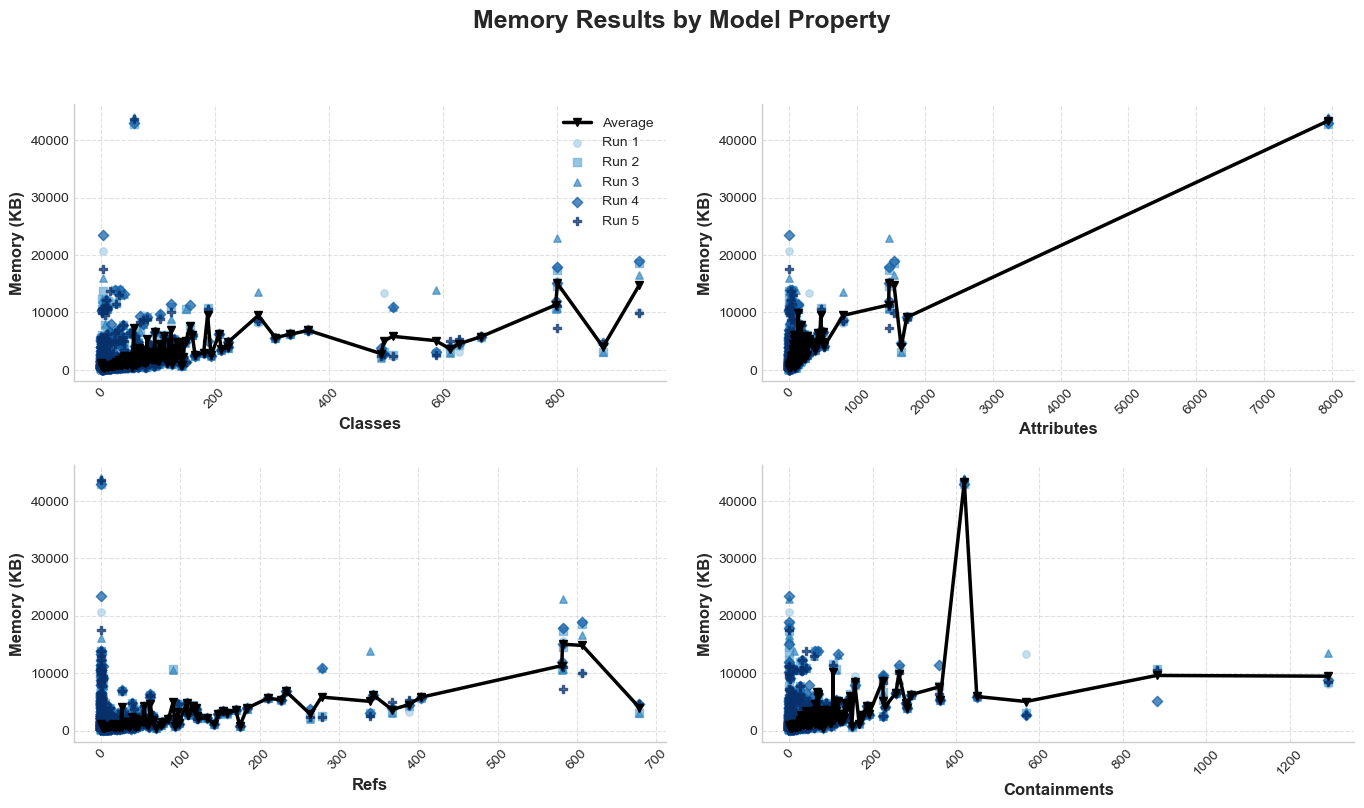

In [131]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

num_runs = len(dfs)
blues = cm.get_cmap('Blues', num_runs + 2)
colors = [blues(i + 2) for i in range(num_runs)]

props = ['classes', 'attributes', 'refs', 'containments']
markers = ['o', 's', '^', 'D', 'P', 'X', '*', 'v']

fig, axes = plt.subplots(2, 2, figsize=(14, 8))
fig.suptitle('Memory Results by Model Property', fontsize=18, fontweight='bold', y=1.02)

for idx, prop in enumerate(props):
    avg_mem = all_df.groupby(prop)['mem'].mean()
    ax = axes[idx // 2, idx % 2]
    # Plot average line
    ax.plot(avg_mem.index, avg_mem.values, color="#000000", linewidth=2.5, label='Average', marker='v')
    # Plot each run with a different marker
    for i, df in enumerate(dfs):
        marker_style = markers[i % len(markers)]
        ax.scatter(df[prop], df['mem'], label=f'Run {i+1}', alpha=0.7, s=28, marker=marker_style, color=colors[i])
    ax.set_xlabel(prop.capitalize(), fontsize=12, fontweight='bold')
    ax.set_ylabel('Memory (KB)', fontsize=12, fontweight='bold')
    ax.tick_params(axis='x', labelsize=10, rotation=45)
    ax.tick_params(axis='y', labelsize=10)
    ax.grid(True, linestyle='--', alpha=0.6)
    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)
    if idx == 0:
        ax.legend(fontsize=10, loc='best')

plt.tight_layout(pad=2)
plt.show()

C:\Users\lamp6\AppData\Local\Temp\ipykernel_7108\207713227.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = ax.boxplot(


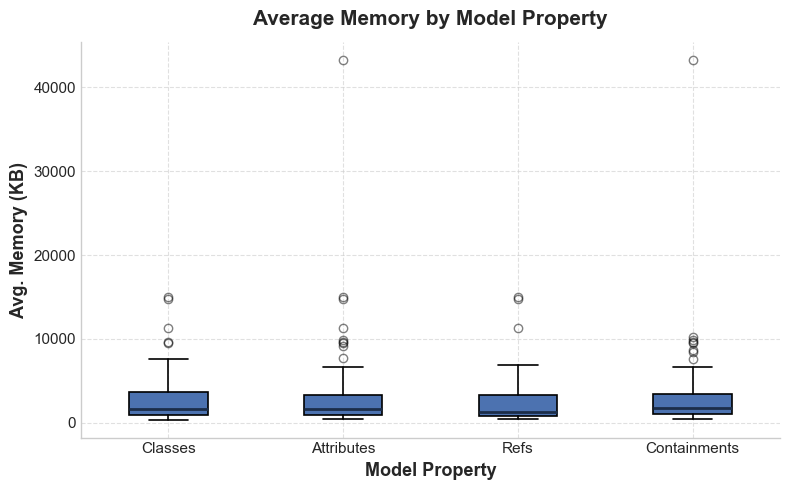

In [132]:
import matplotlib.pyplot as plt 

props = ['classes', 'attributes', 'refs', 'containments']
avg_mem_data = [all_df.groupby(prop)['mem'].mean().values for prop in props]

fig, ax = plt.subplots(figsize=(8, 5))

box = ax.boxplot(
    avg_mem_data,
    vert=True,
    patch_artist=True,
    labels=[p.capitalize() for p in props],
    boxprops=dict(facecolor='#4C72B0', color='black', linewidth=1.2),
    medianprops=dict(color="#1B2D49", linewidth=2),
    whiskerprops=dict(color='black', linewidth=1.2),
    capprops=dict(color='black', linewidth=1.2),
    flierprops=dict(marker='o', color='gray', alpha=0.5)
)

ax.set_xlabel('Model Property', fontsize=13, fontweight='bold')
ax.set_ylabel('Avg. Memory (KB)', fontsize=13, fontweight='bold')
ax.set_title('Average Memory by Model Property', fontsize=15, fontweight='bold', pad=12)
ax.tick_params(axis='x', labelsize=11)
ax.tick_params(axis='y', labelsize=11)
ax.grid(True, linestyle='--', alpha=0.6)

for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

plt.tight_layout()
plt.show()

C:\Users\lamp6\AppData\Local\Temp\ipykernel_7108\2148924134.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  blues = cm.get_cmap('Blues', num_runs + 2)


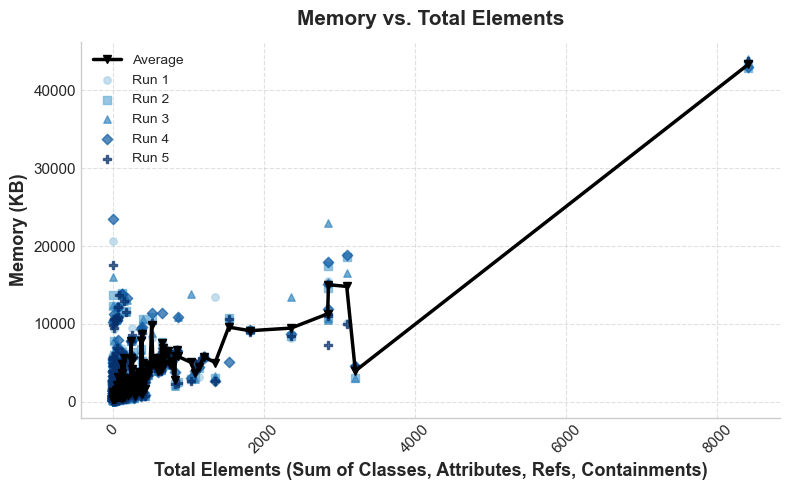

In [133]:
import matplotlib.pyplot as plt 
import matplotlib.cm as cm

num_runs = len(dfs)
blues = cm.get_cmap('Blues', num_runs + 2)
colors = [blues(i + 2) for i in range(num_runs)]

valid_df['total_structural'] = valid_df[['classes', 'attributes', 'refs', 'containments']].sum(axis=1)
model_total_structural = valid_df.set_index('model')['total_structural']


for df in dfs:
    df['total_structural'] = df['model'].map(model_total_structural)


all_df_total = pd.concat(dfs)  
avg_mems = all_df_total.groupby('total_structural')['mem'].mean()

fig, ax = plt.subplots(figsize=(8, 5))


ax.plot(avg_mems.index, avg_mems.values, color="#000000", linewidth=2.5, label='Average', marker='v')


markers = ['o', 's', '^', 'D', 'P', 'X', '*', 'v']
for i, df in enumerate(dfs):
    marker_style = markers[i % len(markers)]
    ax.scatter(df['total_structural'], df['mem'], label=f'Run {i+1}', alpha=0.7, s=28, marker=marker_style, color=colors[i])
ax.set_xlabel('Total Elements (Sum of Classes, Attributes, Refs, Containments)', fontsize=13, fontweight='bold')
ax.set_ylabel('Memory (KB)', fontsize=13, fontweight='bold')
ax.set_title('Memory vs. Total Elements', fontsize=15, fontweight='bold', pad=12)
ax.tick_params(axis='x', labelsize=11, rotation=45)
ax.tick_params(axis='y', labelsize=11)
ax.grid(True, linestyle='--', alpha=0.6)
ax.legend(fontsize=10, loc='best')

for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

plt.tight_layout()
plt.show()

#### Considering the size of the graphs

C:\Users\lamp6\AppData\Local\Temp\ipykernel_7108\3373070366.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  blues = cm.get_cmap('Blues', num_runs + 2)


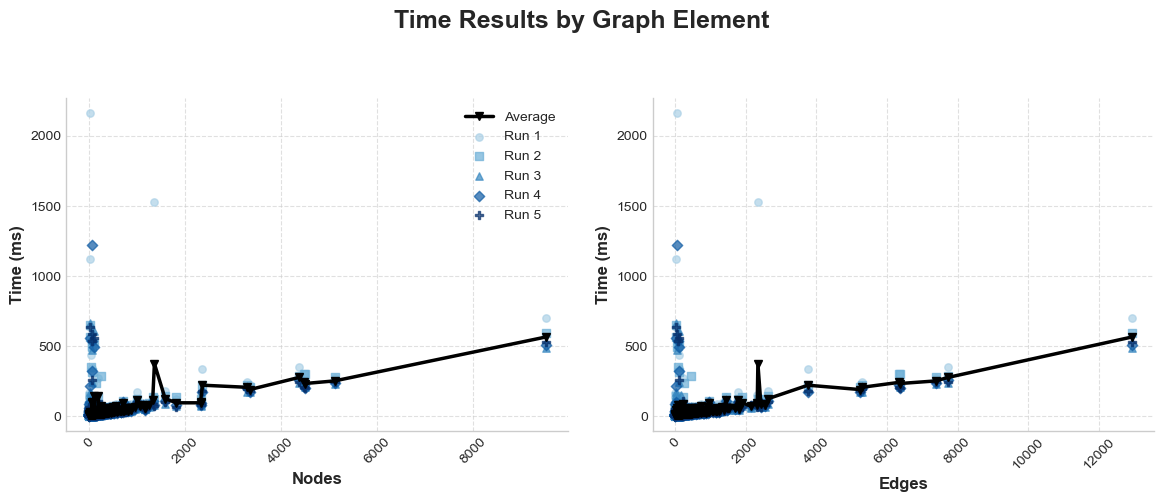

In [134]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

num_runs = len(dfs)
blues = cm.get_cmap('Blues', num_runs + 2)
colors = [blues(i + 2) for i in range(num_runs)]

props = ['nodes', 'edges']
markers = ['o', 's', '^', 'D', 'P', 'X', '*', 'v']

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('Time Results by Graph Element', fontsize=18, fontweight='bold', y=1.02)

for idx, prop in enumerate(props):
    avg_time = all_df.groupby(prop)['time'].mean()
    ax = axes[idx]
    # Plot average line
    ax.plot(avg_time.index, avg_time.values, color="#000000", linewidth=2.5, label='Average', marker='v')
    # Plot each run with a different marker
    for i, df in enumerate(dfs):
        marker_style = markers[i % len(markers)]
        ax.scatter(df[prop], df['time'], label=f'Run {i+1}', alpha=0.7, s=28, marker=marker_style, color=colors[i])
    ax.set_xlabel(prop.capitalize(), fontsize=12, fontweight='bold')
    ax.set_ylabel('Time (ms)', fontsize=12, fontweight='bold')
    ax.tick_params(axis='x', labelsize=10, rotation=45)
    ax.tick_params(axis='y', labelsize=10)
    ax.grid(True, linestyle='--', alpha=0.6)
    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)
    if idx == 0:
        ax.legend(fontsize=10, loc='best')

plt.tight_layout(pad=2)
plt.show()

C:\Users\lamp6\AppData\Local\Temp\ipykernel_7108\1264024622.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  blues = cm.get_cmap('Blues', num_runs + 2)


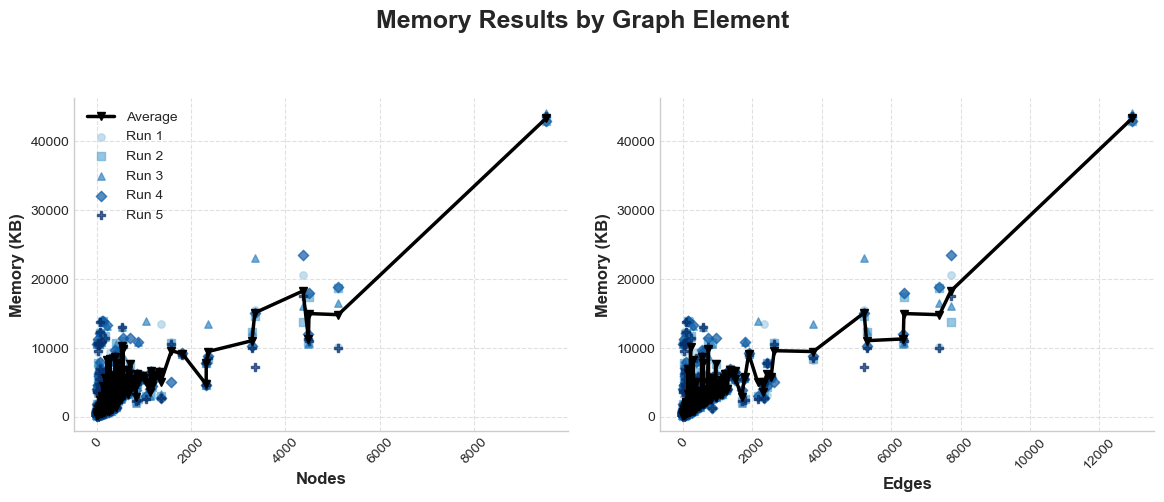

In [135]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

num_runs = len(dfs)
blues = cm.get_cmap('Blues', num_runs + 2)
colors = [blues(i + 2) for i in range(num_runs)]

props = ['nodes', 'edges']
markers = ['o', 's', '^', 'D', 'P', 'X', '*', 'v']

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('Memory Results by Graph Element', fontsize=18, fontweight='bold', y=1.02)

for idx, prop in enumerate(props):
    avg_mem = all_df.groupby(prop)['mem'].mean()
    ax = axes[idx]
    # Plot average line
    ax.plot(avg_mem.index, avg_mem.values, color="#000000", linewidth=2.5, label='Average', marker='v')
    # Plot each run with a different marker
    for i, df in enumerate(dfs):
        marker_style = markers[i % len(markers)]
        ax.scatter(df[prop], df['mem'], label=f'Run {i+1}', alpha=0.7, s=28, marker=marker_style, color=colors[i])
    ax.set_xlabel(prop.capitalize(), fontsize=12, fontweight='bold')
    ax.set_ylabel('Memory (KB)', fontsize=12, fontweight='bold')
    ax.tick_params(axis='x', labelsize=10, rotation=45)
    ax.tick_params(axis='y', labelsize=10)
    ax.grid(True, linestyle='--', alpha=0.6)
    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)
    if idx == 0:
        ax.legend(fontsize=10, loc='best')

plt.tight_layout(pad=2)
plt.show()

### RQ2 Analysis